# LINEAR SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as io
import libsvm
from libsvm.svmutil import *

%matplotlib inline

## 4.1 Linear Support Vector Machine on toy data

### 4.1.1 
Generate a training set of size $100$ with 2D features (X) drawn at random as follows:
* X_{neg} $\sim$ $\mathcal{N}$([-5, -5], 5*$I_2$) and correspond to negative labels (-1)
* X_{pos} $\sim$ $\mathcal{N}$([5, 5], 5*$I_2$) and correspond to positive labels (+1)
<br />
Accordingly, $X = [X_{neg}, X_{pos}]$ is a $100\times2$ array, Y is a $100\times1$ array of values $\in \{-1, 1\}$.
<p/>Draw a scatter plot of the full training dataset with the points colored according to their labels.

In [2]:
# Generate binary class dataset
np.random.seed(0)

n_samples = 100
center_1 = [-5, -5]
center_2 = [5, 5]
cov = [[5,0],[0,5]]
# Generate Data:
Xneg = np.random.multivariate_normal(center_1,cov,n_samples//2)
Xpos = np.random.multivariate_normal(center_2,cov,n_samples//2)
X = np.concatenate((Xneg, Xpos), axis=0)
Y = np.concatenate(([-1]*50, [1]*50), axis=0)



Text(0, 0.5, 'X2')

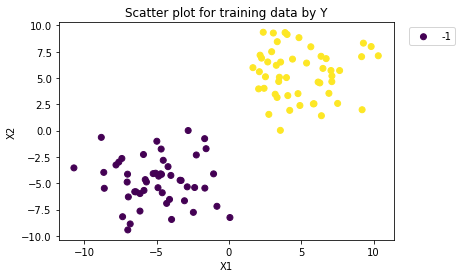

In [3]:
# Scatter plot:
plt.scatter(X[:,0],X[:,1], c = Y)
plt.legend(Y,
           bbox_to_anchor=(1.2, 1),
          ncol = 2)
plt.title('Scatter plot for training data by Y')
plt.xlabel("X1")
plt.ylabel("X2")

### 4.1.2 
Train a linear support vector machine on the data with $C=1$ and draw the decision boundary line that separates o and x. Mark the support vectors separately (ex.circle around the point). 

Note: You can use the libsvm.svmutil functions with the kernel_type set to 0, indiciating a linear kernel and svm_type set to 0 indicating C-SVC.
Also note that the support_vector coefficients returned by the LIBSVM model are the dual coefficients.

In [4]:
# Define the SVM problem
prob = svm_problem(Y,X)
# Define the hyperparameters
param = svm_parameter('-t 0 -c 1 -b 1 -q')

# Train the model
model = svm_train(prob, param)

# Compute the slope and intercept of the separating line/hyperplanee with the use of the support vectors
# and other information from the LIBSVM model.

slope = np.matmul(X[np.array(model.get_sv_indices())-1].T, 
                  np.array(model.get_sv_coef())) 
intercept = -model.rho.contents.value

# Draw the scatter plot, the decision boundary line, and mark the support vectors.
x1 = np.arange(-10,10, 0.01)
x2 = -(x1*slope[0] + intercept)/slope[1]


Text(0, 0.5, 'X2')

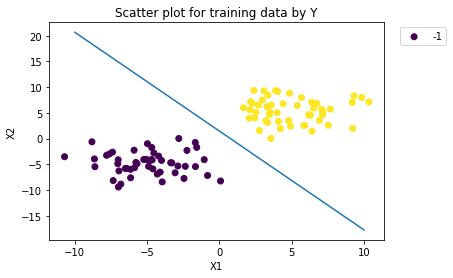

In [5]:
# Draw the scatter plot, the decision boundary line, and mark the support vectors.
plt.scatter(X[:,0],X[:,1], c = Y)
plt.legend(Y,
           bbox_to_anchor=(1.2, 1),
          ncol = 2)
plt.plot(x1,x2)
plt.title('Scatter plot for training data by Y')
plt.xlabel("X1")
plt.ylabel("X2")

### 3.1.3 
Draw a line that separates the data for 8 different $C$ ($10^{-5}$~$10^7$).
Plot the number of support vectors vs. $C$ (plot x-axis on a log scale).
How does the number of support vectors change as $C$ increases and why does it change like that? 

Note: You might prefer to use the command-line style of svm_parameter initialization such as: svm_parameter('-s 0 -t 0') to indicate a linear kernel and C-SVC as the SVM type.


Text(0, 0.5, 'X2')

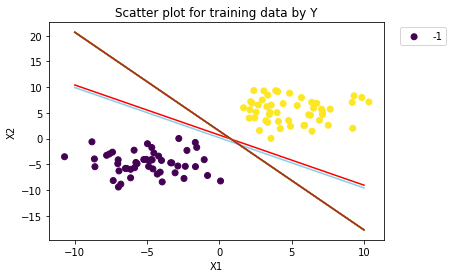

In [6]:

C_range = [10**-5, 10**-3, 1, 10, 100, 10**3, 10**5, 10**7]
num_sv = []
x2s = []
# Loop over a similar setup to that in the previous code block.
for i in range(len(C_range)):
    c = C_range[i]
    prob = svm_problem(Y,X)
    param = svm_parameter('-t 0 -c {} -s 0 -q'.format(c))
    model = svm_train(prob, param)
    number = len(X[np.array(model.get_sv_indices())-1])
    num_sv.append(number)
    slope = np.matmul(X[np.array(model.get_sv_indices())-1].T, 
                  np.array(model.get_sv_coef()))
    intercept = -model.rho.contents.value
    value = -(x1*slope[0] + intercept)/slope[1]
    x2s.append(value)
    
# Draw the scatter plot with multiple decision lines on top (one for each value of C)
plt.scatter(X[:,0],X[:,1], c = Y)
plt.legend(Y,
           bbox_to_anchor=(1.2, 1),
          ncol = 2)
plt.plot(x1,x2s[0],color = "red")
plt.plot(x1,x2s[1],color = "skyblue")
plt.plot(x1,x2s[2],color = "blue")
plt.plot(x1,x2s[3],color = "pink")
plt.plot(x1,x2s[4], color = "yellow")
plt.plot(x1,x2s[5], color = "green")
plt.plot(x1,x2s[6],color = "orange")
plt.plot(x1,x2s[7],"brown")
plt.title('Scatter plot for training data by Y')
plt.xlabel("X1")
plt.ylabel("X2")

Text(0.5, 1.0, 'C vs. supporting vectors')

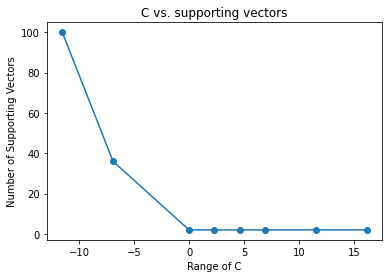

In [7]:
# Draw the num_sv vs. C plot.
plt.plot(np.log(C_range), num_sv)
plt.scatter(np.log(C_range), num_sv)
plt.xlabel("Range of C")
plt.ylabel("Number of Supporting Vectors")
plt.title("C vs. supporting vectors")

As C increases, the number of supporting vectors decreases, and stayed the same after a certain level of C is met. Since C is the penalty parameter, as C gets larger, we would have smaller margin, and thus less support vectors. However, since this is a separable case, a change in C does not really change the result. 


### 3.1.4 
Now try rescaling the data to the [0,1] range and repeat the steps of the previous question (3.1.3) and over the same range of $C$ values. Are the decision boundaries different from those in the previous question? What does this imply about (a) the geometric margin and (b) the relative effect of each feature on the predictions of the trained model ?

#### Solution below: 
SVM tries to maximize the distance between the separating plane and the support vectors. 
If one feature (i.e. one dimension in this space) has very large values, 
it will dominate the other features when calculating the distance. If you rescale all 
features (e.g. to [0, 1]), they all have the same influence on the distance metric.


In [8]:
import sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

# Single line below:
X_train_minmax = min_max_scaler.fit_transform(X)

Text(0, 0.5, 'X2')

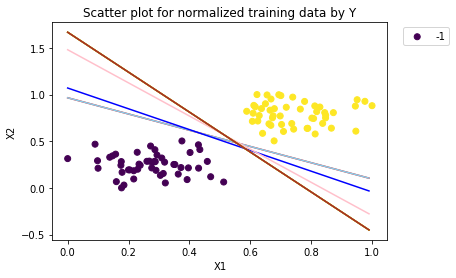

In [9]:

C_range = [10**-5, 10**-3, 1, 10, 100, 10**3, 10**5, 10**7]
num_sv = []
x1 = np.arange(0,1,0.01)
x2s = []
# Repeat the loop from 3.1.3
for i in range(len(C_range)):
    c = C_range[i]
    prob = svm_problem(Y,X_train_minmax)
    param = svm_parameter('-t 0 -c {} -s 0 -q'.format(c))
    model = svm_train(prob, param)
    number = len(X[np.array(model.get_sv_indices())-1])
    num_sv.append(number)
    slope = np.matmul(X_train_minmax[np.array(model.get_sv_indices())-1].T, 
                  np.array(model.get_sv_coef()))
    intercept = -model.rho.contents.value
    value = -(x1*slope[0] + intercept)/slope[1]
    x2s.append(value)
    
# Draw the scatter plot with multiple decision lines on top (one for each value of C)
plt.scatter(X_train_minmax[:,0],X_train_minmax[:,1], c = Y)
plt.legend(Y,
           bbox_to_anchor=(1.2, 1),
          ncol = 2)
plt.plot(x1,x2s[0],color = "red")
plt.plot(x1,x2s[1],color = "skyblue")
plt.plot(x1,x2s[2],color = "blue")
plt.plot(x1,x2s[3],color = "pink")
plt.plot(x1,x2s[4], color = "yellow")
plt.plot(x1,x2s[5], color = "green")
plt.plot(x1,x2s[6],color = "orange")
plt.plot(x1,x2s[7],"brown")
plt.title('Scatter plot for normalized training data by Y')
plt.xlabel("X1")
plt.ylabel("X2")


Text(0.5, 1.0, 'C vs. supporting vectors')

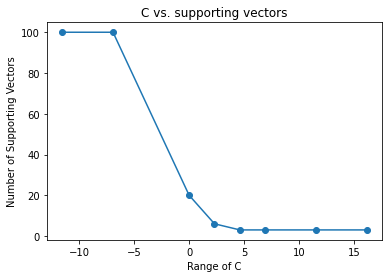

In [10]:
# Draw the num_sv vs. C plot.
plt.plot(np.log(C_range), num_sv)
plt.scatter(np.log(C_range), num_sv)
plt.xlabel("Range of C")
plt.ylabel("Number of Supporting Vectors")
plt.title("C vs. supporting vectors")

The Decision boundaries are different from those in the previous question. This implies that as we rescale the distance such that the distance between the points and the hyperplane are smaller, the relative effect of each feature on the prediction would be shrinked and balanced. 

## *Penguins*



```
# This is formatted as code
```

Multiclass SVM. In this problem, we will use support vector machines to classify penguins species based on the given features.

### 
Load in the penguins data using from the provided penguins.csv file on Sakai. Preprocess the features. Then we will use the train_test_split from sklearn to split the data into training and testing into a 0.8 : 0.2 ratio.

In [11]:
from sklearn.model_selection import train_test_split
# load data
df = pd.read_csv("penguins.csv")
X = min_max_scaler.fit_transform(df.drop(['Species'], axis=1))
df[df.drop(["Species"],axis = 1).columns] = X
df = df.dropna()
# split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Species'], axis=1).to_numpy(), df['Species'].to_numpy(), test_size=0.2, random_state=1)

Train the support vector machine classifier with a linear kernel on the first 5000 datapoints and test the accuracy on the following 5000 points.
Plot test accuracy and the number of support vectors (two separate plots) vs. $C$ for $C=10^{-12}$~$10^{12}$ (plot 7 points or more with the x-axis on a log scale). 

In [12]:
C_range = [10**-12, 10**-7, 10**-3, 1, 10**3, 10**7, 10**12]
num_sv = []
accuracy = []
for c in C_range:
    prob = svm_problem(y_train, X_train)
    param = svm_parameter('-s 0 -t 0 -c {} -q'.format(c))
    model = svm_train(prob, param)
    _,acc,_ = svm_predict(y_test,X_test, model)
    accuracy.append(acc[0])
    number = len(X_train[np.array(model.get_sv_indices())-1])
    num_sv.append(number)

Accuracy = 42.029% (29/69) (classification)
Accuracy = 42.029% (29/69) (classification)
Accuracy = 42.029% (29/69) (classification)
Accuracy = 98.5507% (68/69) (classification)
Accuracy = 98.5507% (68/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)


Text(0.5, 1.0, 'C vs. supporting vectors')

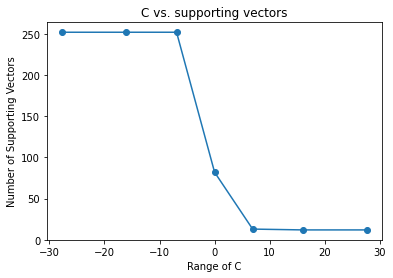

In [13]:
# Draw the num_sv vs. C plot.
plt.plot(np.log(C_range), num_sv)
plt.scatter(np.log(C_range), num_sv)
plt.xlabel("Range of C")
plt.ylabel("Number of Supporting Vectors")
plt.title("C vs. supporting vectors")

Text(0.5, 1.0, 'C vs. Accuracy')

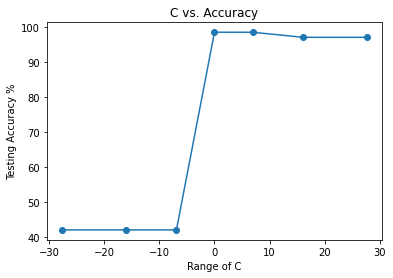

In [14]:
# C range vs. accuracy 
plt.plot(np.log(C_range), accuracy)
plt.scatter(np.log(C_range), accuracy)
plt.xlabel("Range of C")
plt.ylabel("Testing Accuracy %")
plt.title("C vs. Accuracy")

Calculate variable importance (CulmenLength, CulmenDepth, FlipperLength, BodyMass) with your classifier. Rank these variables/ features from most important to the least important. Utilize three strategies covered in the class:
* model reliance
* conditional model reliance
* algorithm reliance

Do all three give the same result?


In [15]:
from sklearn.metrics import hinge_loss

# I combined level 1 and 2 and replace level 0 to -1 based on ED discussion
df['Species'] = df["Species"].replace(2,1).replace(0,-1)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Species'], axis=1).to_numpy(), df['Species'].to_numpy(), test_size=0.2, random_state=1)
prob = svm_problem(y_train, X_train)
param = svm_parameter('-s 0 -t 0 -c {} -q'.format(1))
model = svm_train(prob, param)
_,acc,pvals= svm_predict(y_test,X_test, model)
loss  = hinge_loss(y_test, pvals)

Accuracy = 97.1014% (67/69) (classification)


In [16]:
import random
# Model Reliance 
sc_loss = []
for i in range(0,4):
    shuffled_X_test = X_test.copy()
    # shuffle each variable non-desctructively
    random.shuffle(shuffled_X_test[:,i])
    _,acc,pvals_sc= svm_predict(y_test,shuffled_X_test, model)
    loss_sc  = hinge_loss(y_test, pvals_sc)
    sc_loss.append(loss_sc)
    
    

Accuracy = 65.2174% (45/69) (classification)
Accuracy = 88.4058% (61/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)


Text(0.5, 1.0, 'Bar plot for Model reliance')

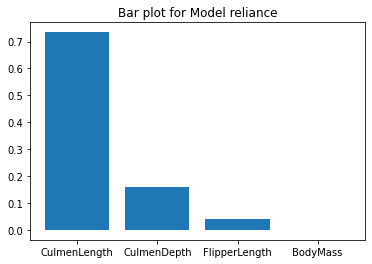

In [17]:
MR = sc_loss - loss
plt.bar(df.columns[0:-1], MR)
plt.title("Bar plot for Model reliance")

In [18]:
# Conditional Model Reliance 
from sklearn.kernel_ridge import KernelRidge
permutation = np.array([[1,2,3],[0,2,3],[0,1,3],[0,1,2]]) # df is the last column 
error = []
for i, k in enumerate(permutation):# i is always not in the k
    ridge = KernelRidge(alpha = 1.0) # idea from Ed Discussion
    ridge.fit(X_test[:,k], X_test[:,i])
    diff = X_test[:,i] - ridge.predict(X_test[:,k]) # Xi - xi hat
    errori = []
    for j in k:
        ridge.fit(X_test[:,permutation[j]], X_test[:,j])
        xik = diff + ridge.predict(X_test[:,permutation[j]]) # xi - xi hat + xk hat
        new_xtest = X_test.copy()
        new_xtest[:,i] = xik
        _,acc,pred = svm_predict(y_test, new_xtest,model)
        errori.append(hinge_loss(y_test, pred))
    error.append(np.mean(errori))# the average loss 
    
        
        

Accuracy = 95.6522% (66/69) (classification)
Accuracy = 95.6522% (66/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 98.5507% (68/69) (classification)
Accuracy = 98.5507% (68/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 98.5507% (68/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)


Text(0.5, 1.0, 'Bar plot for Conditional Model reliance')

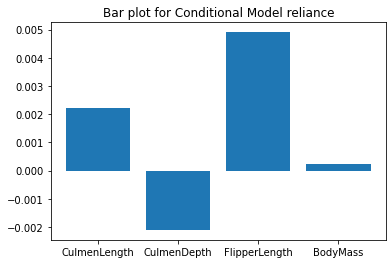

In [19]:
CMR = error - loss
plt.bar(df.columns[0:-1], CMR)
plt.title("Bar plot for Conditional Model reliance")

In [20]:
# Algorithm reliance 
aloss = []
for i in permutation:
    new_trainx = X_train[:,i]
    new_testx = X_test[:,i]
    prob = svm_problem(y_train, new_trainx)
    param = svm_parameter('-s 0 -t 0 -c {} -q'.format(1))
    model = svm_train(prob, param)
    _,acc,pvals= svm_predict(y_test,new_testx, model)
    aloss.append(hinge_loss(y_test, pvals))

Accuracy = 76.8116% (53/69) (classification)
Accuracy = 98.5507% (68/69) (classification)
Accuracy = 97.1014% (67/69) (classification)
Accuracy = 97.1014% (67/69) (classification)


Text(0.5, 1.0, 'Bar plot for Algorithm loss')

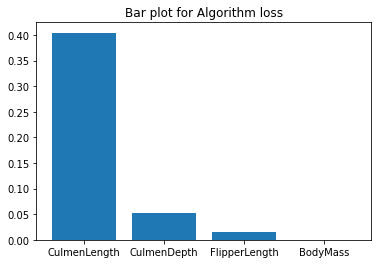

In [21]:
AR = aloss - loss
plt.bar(df.columns[0:-1], AR)
plt.title("Bar plot for Algorithm loss")

Based on the three strategies, I get a similar result where the CulmenLength is always the most important feature, and culmenDepth is always the second most important feature. The result from conditional MR is slightly off, but I would assume that I made some mistakes in the algorithm. 